In [4]:
from pathlib import Path
import pandas as pd
import csv, chardet

BASE = Path.cwd()
PATH_CRQ = BASE / "data_raw" / "mafi" / "CRq - Creditos Financieros (Plano) 1.txt"

def detect_delimiter(path: Path, sample_bytes=200_000):
    raw = path.read_bytes()[:sample_bytes]
    try:
        text = raw.decode("utf-8", errors="replace")
        dialect = csv.Sniffer().sniff(text, delimiters=";,|\t")
        delim = dialect.delimiter
    except Exception:
        head = text.splitlines()[0]
        for d in [";", "|", "\t", ","]:
            if d in head:
                delim = d
                break
        else:
            delim = ","
    return delim

delim = detect_delimiter(PATH_CRQ)
print(f"Delimitador detectado: '{delim}'")

encodings = ["utf-8", "utf-8-sig", "latin1", "cp1252"]
df_crq = None
last_err = None

for enc in encodings:
    try:
        df_crq = pd.read_csv(PATH_CRQ, sep=delim, encoding=enc, engine="python")
        print(f"Leído correctamente con encoding '{enc}'")
        break
    except Exception as e:
        last_err = e
        print(f"Falló con encoding '{enc}' -> {type(e).__name__}: {e}")

if df_crq is None:
    raise last_err

# Resultado preliminar
print(f"\nFilas: {len(df_crq):,} | Columnas: {len(df_crq.columns)}")
print("Columnas detectadas:")
for c in df_crq.columns:
    print(" -", c)

display(df_crq.head(10))


Delimitador detectado: '	'
Falló con encoding 'utf-8' -> UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 4877: invalid continuation byte
Falló con encoding 'utf-8-sig' -> UnicodeDecodeError: 'utf-8' codec can't decode byte 0xd1 in position 4877: invalid continuation byte
Leído correctamente con encoding 'latin1'

Filas: 93,380 | Columnas: 19
Columnas detectadas:
 - Periodo_facturacion
 - Linea
 - Nombre_linea
 - Fecha_aprobacion
 - Nombre_tipo_cliente
 - Cliente
 - Identificacion
 - Centro_costo
 - Nombre_centro_costo
 - Fondo
 - Nombre_fondo
 - No_credito
 - Periocidad
 - Valor_financiacion
 - Cuotas
 - Tipo_interes
 - Vr_neto_matricula
 - Estado_credito
 - Saldo_credito


,Periodo_facturacion,Linea,Nombre_linea,Fecha_aprobacion,Nombre_tipo_cliente,Cliente,Identificacion,Centro_costo,Nombre_centro_costo,Fondo,Nombre_fondo,No_credito,Periocidad,Valor_financiacion,Cuotas,Tipo_interes,Vr_neto_matricula,Estado_credito,Saldo_credito
0,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900002656,1033750094,230110.0,FISIOTERAPIA,10,BOGOTA,23,Mensual,2097900,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
1,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,100023419,1005412286,240110.0,PSICOLOGIA,10,BOGOTA,50,Mensual,1788500,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
2,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,100014489,1014277244,230110.0,FISIOTERAPIA,10,BOGOTA,58,Mensual,1631700,5,Cap. Fijo-Int. vencido,NaN,Cancelado,0
3,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900008855,1020807262,240110.0,DIRECCION DE PSICOLOGIA,10,BOGOTA,14,Mensual,1224000,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
4,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900001670,1077086267,230110.0,FISIOTERAPIA,10,BOGOTA,281,Mensual,1395000,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
5,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900000439,1032366648,214308.0,FISIOTERAPIA,10,BOGOTA,158,Mensual,2170000,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
6,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900003281,1074929565,214309.0,FISIOTERAPIA,10,BOGOTA,161,Mensual,2303000,5,Cap. Fijo-Int. vencido,NaN,Cancelado,0
7,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900005026,1030590872,230210.0,FONOAUDIOLOGIA,10,BOGOTA,166,Mensual,1960000,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
8,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900002129,1015434650,230110.0,FISIOTERAPIA,10,BOGOTA,313,Mensual,1953000,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0
9,201510.0,1,FINANCIACION EDUCATIVA,12/01/2015,ESTUDIANTES,900013657,1136880901,240610.0,LICENCIATURA EN PEDAGOGIA INFANTIL,10,BOGOTA,371,Mensual,1106700,4,Cap. Fijo-Int. vencido,NaN,Cancelado,0


,n_creditos,monto_total_financiado,ticket_medio,cuota_media,plazo_medio,anio_min,anio_max
0,93380,nan,nan,nan,nan,nan,nan


,variable,n_no_nulos,porc_faltantes,cardinalidad,dtype
0,estado_credito,93380,0.0,6,object


Composición por estado_credito (%)


,categoria,pct
0,Cancelado,64.46
1,En Cartera,26.31
2,Confirmado,5.95
3,Anulado,3.09
4,Grabado,0.14
5,Preaprobado,0.04


Distribución por numero_cuotas (%)


""


Distribución por mes_liq (%)


""


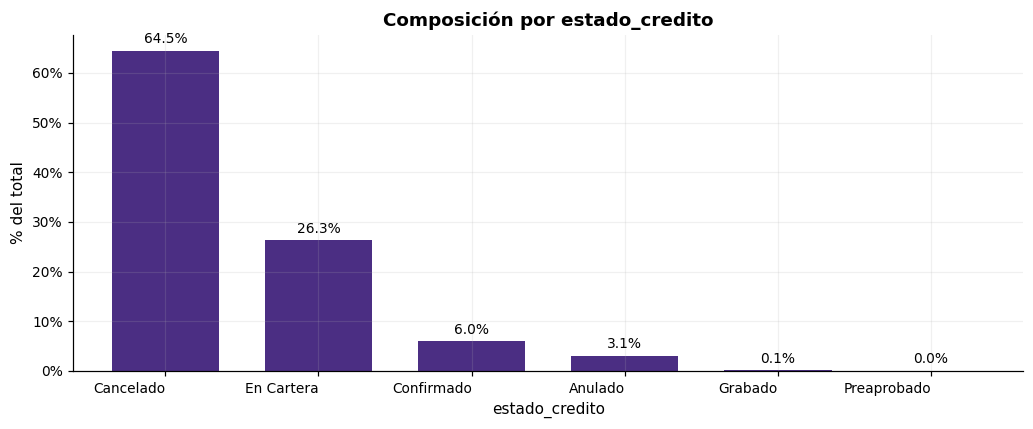

In [ ]:
#EDA CRq Créditos Financiados
import pandas as pd, numpy as np, matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
from cycler import cycler
from pathlib import Path
import re

# Estilo visual
plt.rcParams.update({
    "figure.dpi":110,"axes.spines.top":False,"axes.spines.right":False,"axes.grid":True,
    "grid.alpha":0.18,"axes.titleweight":"bold","axes.titlesize":12,"axes.labelsize":10,
    "xtick.labelsize":9,"ytick.labelsize":9,"legend.frameon":False,"legend.fontsize":9,
    "axes.prop_cycle":cycler(color=["#4B2E83","#005BBB","#7F56D9","#1F7A8C","#E67E22","#2D3748","#3BA99C"])
})

def _annot_pct(ax):
    for p in ax.patches:
        h=p.get_height()
        if not (np.isnan(h) or h==0):
            ax.annotate(f"{h:.1f}%",(p.get_x()+p.get_width()/2,h),
                        ha="center",va="bottom",fontsize=9,xytext=(0,3),textcoords="offset points")

def bar_pct(series, title, xlabel, top=None, rot=45, width=0.7):
    s=series.dropna()
    if s.empty: print(f"(sin datos para {title})"); return
    pct=(s.value_counts(normalize=True)*100).sort_values(ascending=False)
    if top: pct=pct.head(top)
    fig,ax=plt.subplots(figsize=(9.5,4)); pct.plot(kind="bar",ax=ax,width=width)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel("% del total")
    ax.yaxis.set_major_formatter(PercentFormatter(100)); _annot_pct(ax)
    plt.xticks(rotation=rot,ha="right"); plt.tight_layout(); plt.show()

def hist_nice(x, title, xlabel, bins=30):
    x=x.dropna()
    if x.empty: print(f"(sin datos para {title})"); return
    fig,ax=plt.subplots(figsize=(9.5,4))
    ax.hist(x.values, bins=bins)
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel("frecuencia")
    plt.tight_layout(); plt.show()

def box_by_cat(x, g, title, xlabel, ylabel):
    df=pd.DataFrame({"x":x,"g":g}).dropna()
    if df.empty or df["g"].nunique()<2: 
        print(f"(sin datos suficientes para {title})"); return
    order=df["g"].value_counts().index.tolist()[:12]
    data=[df.loc[df["g"]==k,"x"].values for k in order if (df["g"]==k).sum()>0]
    if len(data)<2: print(f"(sin datos suficientes para {title})"); return
    fig,ax=plt.subplots(figsize=(10,4))
    bp=ax.boxplot(data, labels=[str(k) for k in order], showfliers=False, patch_artist=True)
    for patch,c in zip(bp["boxes"], ["#C8B6FF","#A78BFA","#7C3AED","#5B21B6","#4338CA","#1E3A8A","#4B2E83","#3BA99C","#005BBB","#E67E22","#2D3748","#1F7A8C"][:len(bp["boxes"])]):
        patch.set_facecolor(c); patch.set_alpha(0.65); patch.set_edgecolor("#444")
    ax.set_title(title); ax.set_xlabel(xlabel); ax.set_ylabel(ylabel)
    plt.xticks(rotation=45,ha="right"); plt.tight_layout(); plt.show()

# Normaliza encabezados y sinónimos de columnas (CRq)
def snake_simple(cols):
    out=[]
    for c in cols:
        c=str(c).strip().lower()
        c=re.sub(r"[áàä]","a",c); c=re.sub(r"[éèë]","e",c); c=re.sub(r"[íìï]","i",c)
        c=re.sub(r"[óòö]","o",c); c=re.sub(r"[úùü]","u",c); c=re.sub(r"ñ","n",c)
        c=re.sub(r"[^\w\s]"," ",c); c=re.sub(r"\s+","_",c).strip("_")
        out.append(c)
    return out

df_crq = df_crq.copy()
df_crq.columns = snake_simple(df_crq.columns)

# Mapeo de nombres
syn = {
    "numero_credito":"numero_credito",
    "num_credito":"numero_credito",
    "nro_credito":"numero_credito",
    "valor_cuota":"valor_cuota",
    "cuota":"valor_cuota",
    "valor_financiado":"valor_financiado",
    "monto_financiado":"valor_financiado",
    "monto":"valor_financiado",
    "fecha_liquidacion":"fecha_liquidacion",
    "fecha_liq":"fecha_liquidacion",
    "estado_credito":"estado_credito",
    "estado":"estado_credito",
    "numero_cuotas":"numero_cuotas",
    "n_cuotas":"numero_cuotas",
    "plazo":"numero_cuotas",
    "tasa":"tasa",
}
df_crq = df_crq.rename(columns={k:v for k,v in syn.items() if k in df_crq.columns})

# Casting de tipos 
def to_number(s):
    return (pd.to_numeric(
        s.astype(str).str.replace(r"[\s\$\.,](?=\d{3}\b)","", regex=True)
         .str.replace(",","."), errors="coerce"))

num_cols = [c for c in ["valor_cuota","valor_financiado","tasa"] if c in df_crq.columns]
int_cols = [c for c in ["numero_cuotas"] if c in df_crq.columns]

for c in num_cols: df_crq[c] = to_number(df_crq[c])
for c in int_cols: df_crq[c] = pd.to_numeric(df_crq[c], errors="coerce").astype("Int64")

if "fecha_liquidacion" in df_crq.columns:
    df_crq["fecha_liquidacion"] = pd.to_datetime(df_crq["fecha_liquidacion"], errors="coerce", dayfirst=True)
    df_crq["anio_liq"] = df_crq["fecha_liquidacion"].dt.year
    df_crq["mes_liq"]  = df_crq["fecha_liquidacion"].dt.to_period("M").astype(str)

# Feature 
if {"valor_cuota","valor_financiado"}.issubset(df_crq.columns):
    df_crq["cuota_vs_financiado_pct"] = (df_crq["valor_cuota"]/df_crq["valor_financiado"]*100).replace([np.inf,-np.inf], np.nan)

# Tablas para el informe 
present = [c for c in ["numero_credito","valor_cuota","valor_financiado","numero_cuotas",
                       "fecha_liquidacion","estado_credito","tasa","anio_liq","mes_liq",
                       "cuota_vs_financiado_pct"] if c in df_crq.columns]

tabla_ejecutiva = pd.DataFrame({
    "n_creditos":[df_crq["numero_credito"].nunique() if "numero_credito" in present else len(df_crq)],
    "monto_total_financiado":[float(df_crq["valor_financiado"].sum()) if "valor_financiado" in present else np.nan],
    "ticket_medio":[float(df_crq["valor_financiado"].mean()) if "valor_financiado" in present else np.nan],
    "cuota_media":[float(df_crq["valor_cuota"].mean()) if "valor_cuota" in present else np.nan],
    "plazo_medio":[float(df_crq["numero_cuotas"].dropna().mean()) if "numero_cuotas" in present else np.nan],
    "anio_min":[int(np.nanmin(df_crq["anio_liq"])) if "anio_liq" in present and df_crq["anio_liq"].notna().any() else np.nan],
    "anio_max":[int(np.nanmax(df_crq["anio_liq"])) if "anio_liq" in present and df_crq["anio_liq"].notna().any() else np.nan],
})
display(tabla_ejecutiva.style.format({
    "monto_total_financiado":"{:,.0f}","ticket_medio":"{:,.0f}","cuota_media":"{:,.0f}","plazo_medio":"{:,.1f}"
}))

qc = pd.DataFrame({
    "variable": present,
    "n_no_nulos": [df_crq[v].notna().sum() for v in present],
    "porc_faltantes": [round(df_crq[v].isna().mean()*100,2) for v in present],
    "cardinalidad": [df_crq[v].nunique(dropna=True) for v in present],
    "dtype": [str(df_crq[v].dtype) for v in present],
}).sort_values("variable").reset_index(drop=True)
display(qc)

def tabla_pct(series, top=None):
    s=series.dropna()
    if s.empty: return pd.DataFrame(columns=["categoria","pct"])
    t=(s.value_counts(normalize=True)*100).sort_values(ascending=False)
    if top: t=t.head(top)
    return t.round(2).rename_axis("categoria").reset_index(name="pct")

tbl_estado = tabla_pct(df_crq["estado_credito"]) if "estado_credito" in present else pd.DataFrame()
tbl_plazo  = tabla_pct(df_crq["numero_cuotas"])  if "numero_cuotas"  in present else pd.DataFrame()
tbl_mes    = tabla_pct(df_crq["mes_liq"])        if "mes_liq"        in present else pd.DataFrame()

print("Composición por estado_credito (%)"); display(tbl_estado)
print("Distribución por numero_cuotas (%)"); display(tbl_plazo.head(15))
print("Distribución por mes_liq (%)");       display(tbl_mes.head(15))

# Gráficos 
if "estado_credito" in present: bar_pct(df_crq["estado_credito"], "Composición por estado_credito", "estado_credito", rot=0)
if "numero_cuotas"  in present: bar_pct(df_crq["numero_cuotas"], "Distribución por numero_cuotas (top 15)", "numero_cuotas", top=15, rot=0)

if "valor_financiado" in present: hist_nice(df_crq["valor_financiado"], "Distribución de valor_financiado", "valor_financiado")
if "valor_cuota" in present:      hist_nice(df_crq["valor_cuota"], "Distribución de valor_cuota", "valor_cuota")

if {"valor_financiado","estado_credito"}.issubset(present):
    box_by_cat(df_crq["valor_financiado"], df_crq["estado_credito"],
               "valor_financiado por estado_credito (top 12)", "estado_credito", "valor_financiado")

if "cuota_vs_financiado_pct" in present:
    hist_nice(df_crq["cuota_vs_financiado_pct"].clip(upper=100), "Relación cuota/financiado (%)", "cuota_vs_financiado_pct")

if {"mes_liq","estado_credito"}.issubset(present):
    pv = pd.crosstab(df_crq["mes_liq"], df_crq["estado_credito"], normalize="index")*100
    if not pv.empty:
        pv = pv.sort_index()
        fig,ax=plt.subplots(figsize=(11,4)); left=np.zeros(len(pv))
        for c in pv.columns:
            vals=pv[c].values
            ax.bar(pv.index.astype(str), vals, bottom=left, label=str(c), edgecolor="white", linewidth=0.4)
            left+=vals
        ax.set_title("Mix de estado_credito por mes_liq (% por mes)"); ax.set_xlabel("mes_liq"); ax.set_ylabel("% dentro de mes")
        ax.yaxis.set_major_formatter(PercentFormatter(100))
        ax.legend(title="estado_credito", ncols=min(len(pv.columns),8), bbox_to_anchor=(1.02,1), loc="upper left")
        plt.xticks(rotation=45, ha="right"); plt.tight_layout(); plt.show()

